# Heart Attack Analysis - LIME explanations 

## Task

For the selected dataset and models, prepare a knitr/jupyter notebook based on the following points (you can reuse models from previous Homeworks).
Submit your results on GitHub to the directory `Homeworks/HW3`.

1. Calculate the predictions for some selected observations
2. Then, calculate the decomposition of these predictions with `LIME` using the package of choice, e.g. in Python: `lime`, `dalex`, in R: `iml`, `localModel`.
3. Compare LIME for various observations in the dataset. How stable are these explanations? 
4. Compare LIME with the explanations obtained using SHAP. What are the main differences between them?
5. Compare LIME between at least two different models. Are there any systematic differences across many observations?
6. Comment on the results obtained in (3), (4) and (5)


## 1. Calculate the predictions for some selected observations

In [ ]:
chosen_indices = [0, 1]

test_subset, label = test_ds.iloc[chosen_indices], y_test.iloc[chosen_indices]
preds = model.predict_proba(test_subset) 

preds

array([[0.49, 0.51],
       [0.64, 0.36]])

In [ ]:
label

25     1
239    0
Name: output, dtype: int64

We see that our two chosen examples have different labels, which might be important in further analysis.

## 2. Then, calculate the decomposition of these predictions with `LIME` using the package of choice, e.g. in Python: `lime`, `dalex`, in R: `iml`, `localModel`.

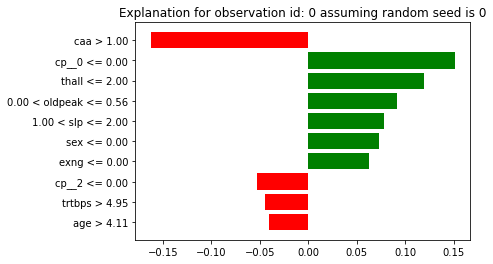

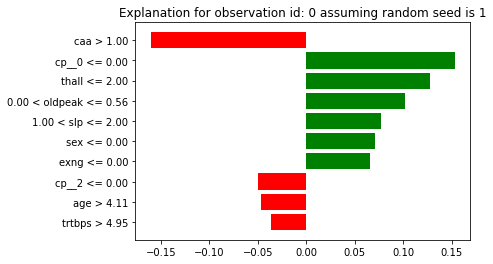
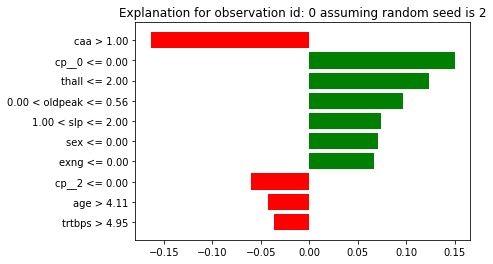

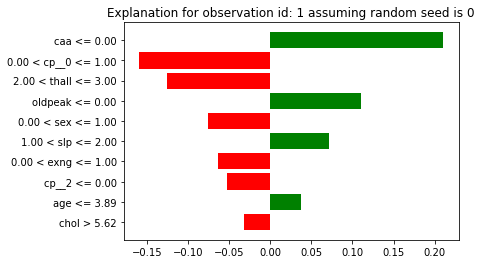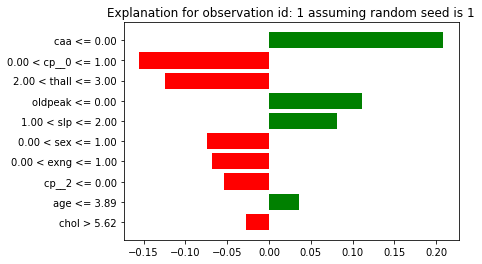

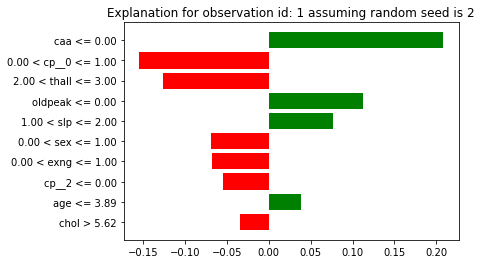

## 3. Compare LIME for various observations in the dataset. How stable are these explanations? 


We compared LIME explanations for two first examples of our dataset. There is a significant difference between predictions for the two examples, as they have different labels. But in terms of importance of the features, for both examples top 4 important features according to LIME are `caa`, `cp__0`, `thall` and `oldpeak`. The directions are reasonably different, as the examples have different values of `caa` feature (positive vs. negative).

Explanations within a single example are reasonably stable if we change the random seed. Sometimes the two neighboring variables are swapped, but not with much change to their importance. It is visible that changing the random seed causes just small perturbation, not disrupting the overall explanation. 

## 4. Compare LIME with the explanations obtained using SHAP. What are the main differences between them?



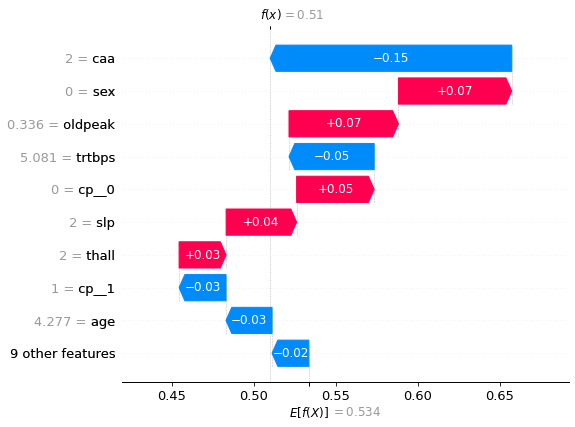

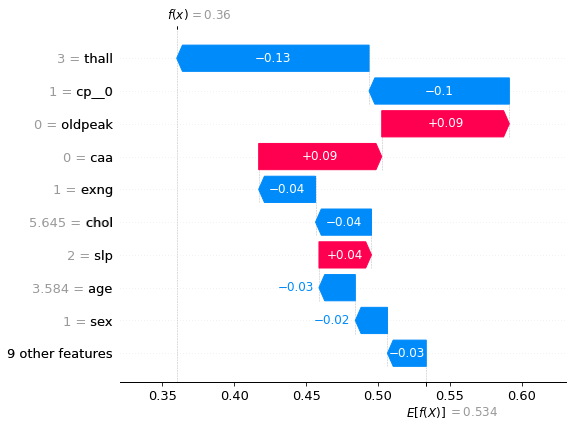

In [ ]:
# SHAP explanations from the previous homework

For the first example, feature `caa` has the biggest in both LIME and SHAP. However, the next features are significantly different: in LIME the next is `cp_0` and this feature is only the fifth important in SHAP. Also `thall` variable is given much more importance in LIME than SHAP (top3 vs. top7)

For the second example the difference in variables importance is even more visible - the top1 features are already different. Overall, the directions of the explanations (variable sign) remain similar across explanations.

We see significant difference in attributions but the general overview of the explanations and their signs wrt. variables remain roughly the same. 

# 5. Compare LIME between at least two different models. Are there any systematic differences across many observations?


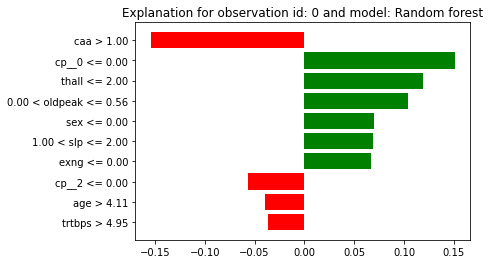

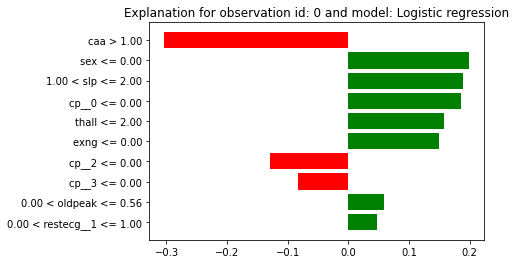



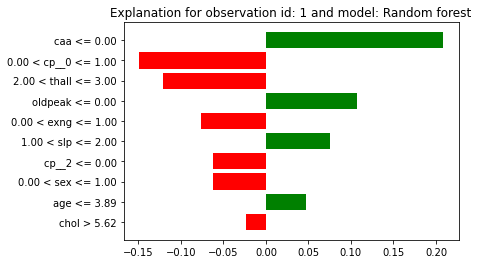

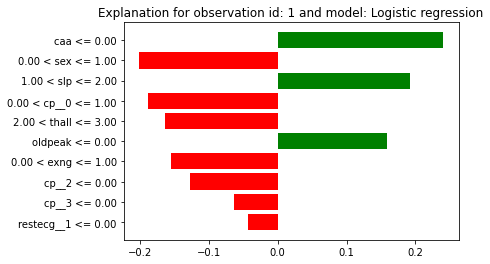

There are differences that are visible across both observations: the second and third most important features for the random forest are `cp_0` and `thall`, while for logistic regression we see `sex` and `slp` in both examples.

 We had analogous observations when analyzing SHAP explanations in the previous homework, which indicates that these attributions are model-dependent. 

## 6. Comment on the results obtained in (3), (4) and (5)

There are slight differences between SHAP and LIME explanations, given the same model and example. However, the changes aren't that big so that they would lead to different conclusions, in most of the cases. In particular, we see that some variables get bigger attribution in both SHAP and LIME when we change the model from random forest to logistic regression, which might mean that attributions are more dependent on the model than the actual method used to explain it.

# Appendix

In [1]:
import plotly.io as pio

pio.renderers.default = "notebook"

In [ ]:
# Download the dataset
!gdown --id 1NZWMlrVLLFcpeUxIUK8b5gG3DZ0qN3C2
!unzip heart_attack.zip

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1NZWMlrVLLFcpeUxIUK8b5gG3DZ0qN3C2
To: /content/heart_attack.zip
100% 4.21k/4.21k [00:00<00:00, 6.54MB/s]
Archive:  heart_attack.zip
  inflating: heart.csv               
  inflating: o2Saturation.csv        


In [ ]:
!pip install shap
!pip install dalex
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 275 kB 25.0 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=f9d1ce583e32685b335e816394b3ba93c0cb3b5180dd1a4af2787aa75dde9e26
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

# models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# metrics
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import plot_roc_curve

# Initial eyeballing over the data

We look at total number of examples (303) and also investigate balance of positive/negative class.

In [ ]:
ds = pd.read_csv('heart.csv')
print('Number of examples: ', len(ds))
ds.head()

Number of examples:  303


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Class balance

We can see that classes are pretty balanced so we don't have to apply any specific techniques for that

In [ ]:
ds.output.value_counts()

1    165
0    138
Name: output, dtype: int64

# Variables description

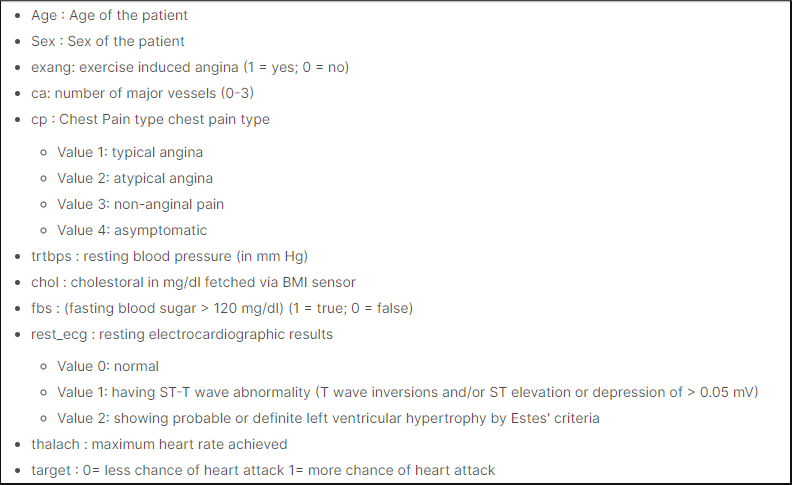

# Data preprocessing

We apply log transform to the numerical variables (so that they are more friendly for logistic regression-type models) and one-hot encoding for categorical variables.

In [ ]:
continuous_cols = ['age', 'chol','oldpeak', 'thalachh', 'trtbps']
categorical_cols = ['cp', 'restecg']

def categoricalize(df, columns):
    for col in columns:
        dummy_values = pd.get_dummies(df[col])
        for v in dummy_values.columns:
            df = pd.concat([df, dummy_values[v].rename(f'{col}__{v}')], axis=1)
    return df.drop(columns=columns)

processed_ds = categoricalize(ds, categorical_cols)

for col in continuous_cols:
    processed_ds[col] = np.log1p(ds[col])

x, y = processed_ds.drop(columns=['output']), processed_ds['output']

x_train, x_test, y_train, y_test=train_test_split(x, y,
                                               test_size=0.2,
                                               random_state=2139) 


train_ds = x_train
test_ds = x_test

# Metrics

For the binary classification we measure the following metrics:


*   Accuracy
*   Precision
*   Recall
*   F1
*   MSE

and also plot the confusion matrix



In [ ]:
def compute_metrics(y_pred, y_gt):
    cm=confusion_matrix(y_gt, y_pred)
    class_label = ["Low-risk", "High-risk"]
    df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
    sns.heatmap(df_cm,annot=True,cmap='Pastel1',linewidths=2,fmt='d')
    plt.title("Confusion Matrix",fontsize=15)
    plt.xlabel("predicted")
    plt.ylabel("actual")
    plt.show()

    acc=accuracy_score(y_gt,y_pred)
    mse=mean_squared_error(y_gt,y_pred)
    precision, recall, fscore, train_support = score(y_gt, y_pred, pos_label=1, average='binary')
    print('Precision: {} \nRecall: {} \nF1: {} \nAccuracy: {} %\nMSE: {}'.format(
        round(precision, 3), round(recall, 3), round(fscore,3), round((acc*100),3), round((mse),3)))

def train_and_evaluate_model(model):
    model.fit(train_ds, y_train)
    y_pred = model.predict(test_ds)

    compute_metrics(y_pred, y_test)
    plot_roc_curve(model, test_ds, y_test)
    return model

## 1. Calculate the predictions for some selected observations

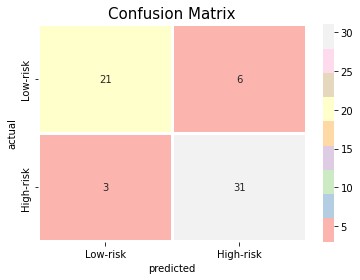

Precision: 0.838 
Recall: 0.912 
F1: 0.873 
Accuracy: 85.246 %
MSE: 0.148


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


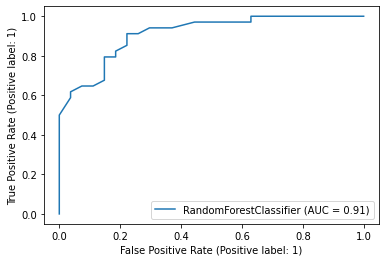

In [ ]:
# Fix the rng
np.random.seed(2137)

model = train_and_evaluate_model(RandomForestClassifier(random_state=69))

In [ ]:
chosen_indices = [0, 1]

test_subset, label = test_ds.iloc[chosen_indices], y_test.iloc[chosen_indices]
preds = model.predict_proba(test_subset) 

preds

array([[0.49, 0.51],
       [0.64, 0.36]])

In [ ]:
label

25     1
239    0
Name: output, dtype: int64

We see that our two chosen examples have different labels, which might be important in further analysis.

## 2. Then, calculate the decomposition of these predictions with `LIME` using the package of choice, e.g. in Python: `lime`, `dalex`, in R: `iml`, `localModel`.


In [ ]:
import dalex as dx 

explainer = dx.Explainer(model, train_ds, y_train)

Preparation of a new explainer is initiated

  -> data              : 242 rows 18 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 242 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x7fe7cc3fa320> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.541, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.36, mean = 0.000744, max = 0.33
  -> model_info        : package sklearn

A new explainer has been created!


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


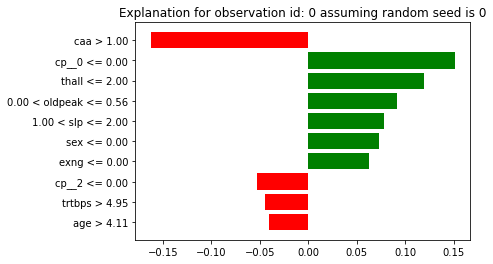

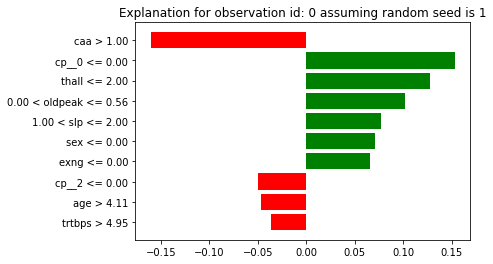

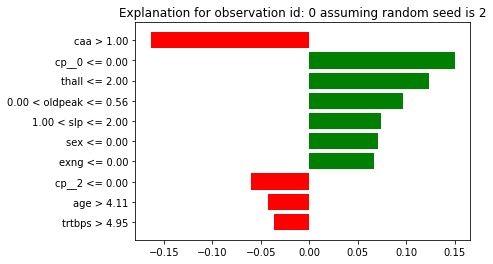

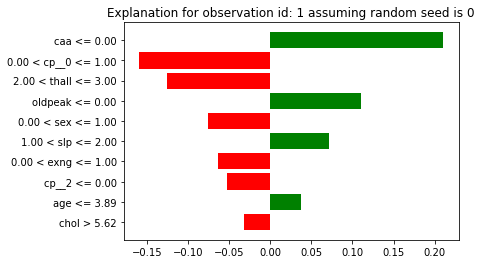

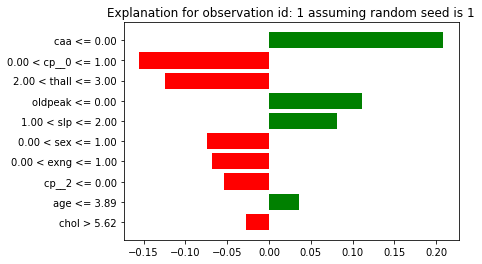

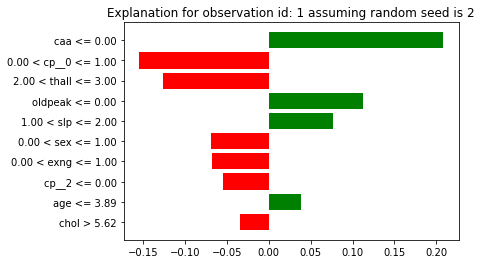

In [ ]:
import random

for obs_idx in range(2):
    for seed in range(3):
        random.seed(seed)
        np.random.seed(seed)
        explanation = explainer.predict_surrogate(test_subset.iloc[obs_idx])
        explanation.plot()
        plt.title(f'Explanation for observation id: {obs_idx} assuming random seed is {seed}')
# explanation.

## 3. Compare LIME for various observations in the dataset. How stable are these explanations? 


We compared LIME explanations for two first examples of our dataset. There is a significant difference between predictions for the two examples, as they have different labels. But in terms of importance of the features, for both examples top 4 important features according to LIME are `caa`, `cp__0`, `thall` and `oldpeak`. The directions are reasonably different, as the examples have different values of `caa` feature (positive vs. negative).

Explanations within a single example are reasonably stable if we change the random seed. Sometimes the two neighboring variables are swapped, but not with much change to their importance. It is visible that changing the random seed causes just small perturbation, not disrupting the overall explanation. 

## 4. Compare LIME with the explanations obtained using SHAP. What are the main differences between them?


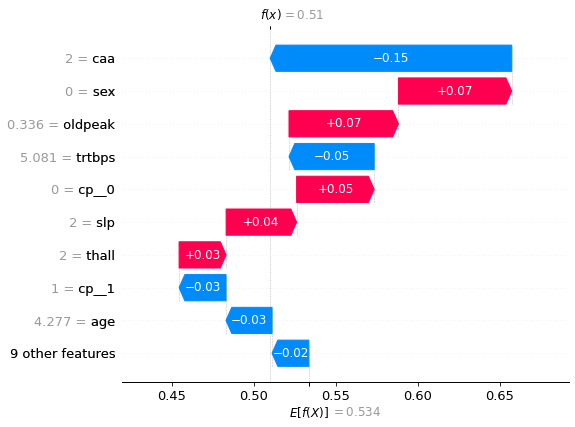

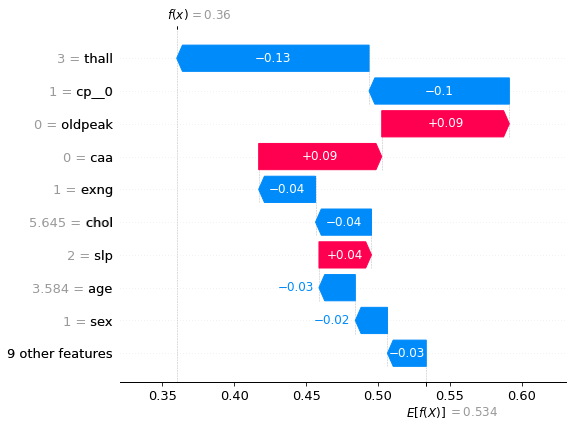

In [ ]:
shap_explainer = shap.explainers.Tree(model, data=train_ds, model_output="probability")
shap_values = shap_explainer(test_subset)

for v in shap_values:
    shap.plots.waterfall(v[:, 1])

For the first example, feature `caa` has the biggest in both LIME and SHAP. However, the next features are significantly different: in LIME the next is `cp_0` and this feature is only the fifth important in SHAP. Also `thall` variable is given much more importance in LIME than SHAP (top3 vs. top7)

For the second example the difference in variables importance is even more visible - the top1 features are already different. Overall, the directions of the explanations (variable sign) remain similar across explanations.

We see significant difference in attributions but the general overview of the explanations and their signs wrt. variables remain roughly the same. 

# 5. Compare LIME between at least two different models. Are there any systematic differences across many observations?


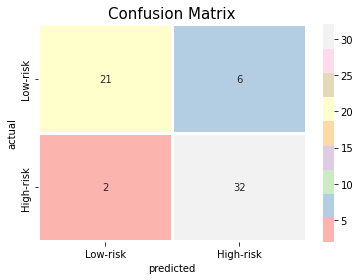

Precision: 0.842 
Recall: 0.941 
F1: 0.889 
Accuracy: 86.885 %
MSE: 0.131
Preparation of a new explainer is initiated

  -> data              : 242 rows 18 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 242 values
  -> model_class       : sklearn.linear_model._logistic.LogisticRegression (default)
  -> label             : LogReg
  -> predict function  : <function yhat_proba_default at 0x7fe7cc3fa320> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.00561, mean = 0.541, max = 0.995
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.968, mean = 1.64e-06, max = 0.928
  -> model_info        : package sklearn

A new explainer has been created!


Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
X does not have valid feature names, but LogisticRegression was fitted with feature names


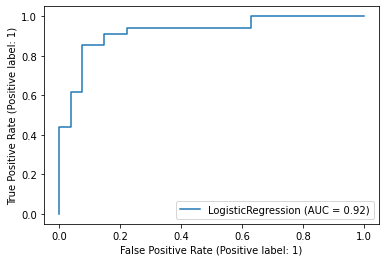

In [ ]:
reg_model = train_and_evaluate_model(LogisticRegression(random_state=69, max_iter=1000))
reg_explainer = dx.Explainer(reg_model, train_ds, y_train, label="LogReg")

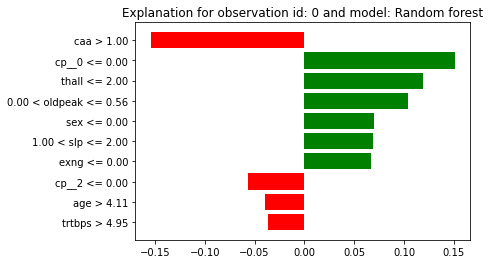

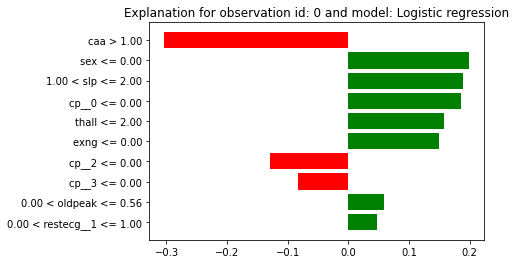

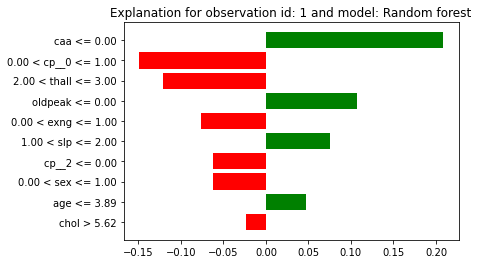

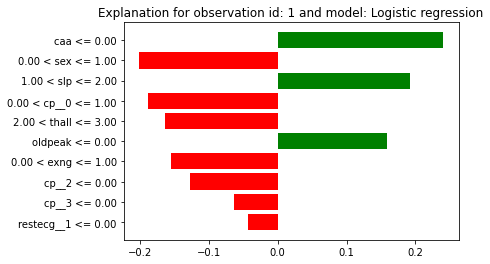

In [ ]:
explainers = {
    "Random forest": explainer,
    "Logistic regression": reg_explainer,
}

for obs_idx in range(2):
    for explainer_name, model_exp in explainers.items():
        explanation = model_exp.predict_surrogate(test_subset.iloc[obs_idx])
        explanation.plot()
        plt.title(f'Explanation for observation id: {obs_idx} and model: {explainer_name}')

There are differences that are visible across both observations: the second and third most important features for the random forest are `cp_0` and `thall`, while for logistic regression we see `sex` and `slp` in both examples.

 We had analogous observations when analyzing SHAP explanations in the previous homework, which indicates that these attributions are model-dependent. 